In [7]:
from pathlib import Path

from PySAGA_cmd import SAGA
from PySAGA_cmd.objects import get_sample_dem
import matplotlib.pyplot as plt

# Creating a Tool object

In [8]:
# Instantiating a SAGA environment
saga = SAGA()

# Choosing a library
ta_morphometry = saga / 'ta_morphometry'

# Choosing a tool
slope_aspect = ta_morphometry / 'Slope, Aspect, Curvature'
slope_aspect.flag = 'help'

# Use this line of code to see which parameters you have to set
print(slope_aspect.execute().stdout)

slope_aspect.flag = None

Path to "saga_cmd" was not provided. Attempting to find it.
saga_cmd found at "saga_cmd".
____________________________

   #####   ##   #####    ##
  ###     ###  ##       ###
   ###   # ## ##  #### # ##
    ### ##### ##    # #####
 ##### #   ##  ##### #   ##
____________________________

SAGA Version: 8.5.0

____________________________
library path: /usr/lib/x86_64-linux-gnu/saga/
library name: libta_morphometry
library     : ta_morphometry
tool        : Slope, Aspect, Curvature
identifier  : 0
author      : O.Conrad (c) 2001
processors  : 4 [4]
____________________________

Name:	Slope, Aspect, Curvature
ID:	0
Author:	O.Conrad (c) 2001
Version:	1.0
Specification:	grid

____________________________
Description:
Calculates the local morphometric terrain parameters slope, aspect and if supported by the chosen method also the curvature. Besides tangential curvature also its horizontal and vertical components (i.e. plan and profile curvature) can be calculated.
__________________________

# Running the tool

In [9]:
dem_dir = get_sample_dem()

output_dir = Path('../../data/example_output/')
slope_dir = output_dir / 'SLOPE_30m.sdat'
aspect_dir = output_dir / 'ASPECT_30m.sdat'
c_gene_dir = output_dir / 'C_GENE_30m.sdat'
c_prof_dir = output_dir / 'C_PROF_30m.sdat'
c_plan_dir = output_dir / 'C_PLAN_30m.sdat'
c_tang_dir = output_dir / 'C_TANG_30m.sdat'
c_long_dir = output_dir / 'C_LONG_30m.sdat'
c_cros_dir = output_dir / 'C_CROS_30m.sdat'
c_mini_dir = output_dir / 'C_MINI_30m.sdat'
c_maxi_dir = output_dir / 'C_MAXI_30m.sdat'
c_tota_dir = output_dir / 'C_TOTA_30m.sdat'
c_roto_dir = output_dir / 'C_ROTO_30m.sdat'

# Simply pass the arguments to the 'execute' method
output = slope_aspect.execute(
    elevation=dem_dir,
    slope=slope_dir,
    aspect=aspect_dir,
    c_gene=c_gene_dir,
    c_prof=c_prof_dir,
    c_plan=c_plan_dir,
    c_tang=c_tang_dir,
    c_long=c_long_dir,
    c_cros=c_cros_dir,
    c_mini=c_mini_dir,
    c_maxi=c_maxi_dir,
    c_tota=c_tota_dir,
    c_roto=c_roto_dir,
    method='6',
    unit_slope='1',
    unit_aspect='1'
)

In [15]:
# The 'output' variable is now an output object. To print out the text result just print the text attribute
assert output.stdout is not None
print(output.stdout[:650]) # output is truncated

____________________________

   #####   ##   #####    ##
  ###     ###  ##       ###
   ###   # ## ##  #### # ##
    ### ##### ##    # #####
 ##### #   ##  ##### #   ##
____________________________

SAGA Version: 8.5.0

____________________________
library path: /usr/lib/x86_64-linux-gnu/saga/
library name: libta_morphometry
library     : ta_morphometry
tool        : Slope, Aspect, Curvature
identifier  : 0
author      : O.Conrad (c) 2001
processors  : 4 [4]
____________________________

loading: DEM_30m


  1%
  2%
  3%
  4%
  5%
  6%
  7%
  8%
  9%
 10%
 11%
 12%
 13%
 14%
 15%
 16%
 17%
 18%
 19%
 20%
 21%
 22%
 23%
 24%
 25%
 26%
 27%
 2


# Plotting some of the output rasters

In [16]:
rasters = output.rasters
rasters

{'elevation': Raster(path=PosixPath('/media/alex/SSD_ALEX/python-modules-packages-utils/scripts/geomorphology/tools/PySAGA_cmd/PySAGA_cmd/../assets/DEM_30m.tif')),
 'slope': Raster(path=PosixPath('../../data/example_output/SLOPE_30m.sdat')),
 'aspect': Raster(path=PosixPath('../../data/example_output/ASPECT_30m.sdat')),
 'c_gene': Raster(path=PosixPath('../../data/example_output/C_GENE_30m.sdat')),
 'c_prof': Raster(path=PosixPath('../../data/example_output/C_PROF_30m.sdat')),
 'c_plan': Raster(path=PosixPath('../../data/example_output/C_PLAN_30m.sdat')),
 'c_tang': Raster(path=PosixPath('../../data/example_output/C_TANG_30m.sdat')),
 'c_long': Raster(path=PosixPath('../../data/example_output/C_LONG_30m.sdat')),
 'c_cros': Raster(path=PosixPath('../../data/example_output/C_CROS_30m.sdat')),
 'c_mini': Raster(path=PosixPath('../../data/example_output/C_MINI_30m.sdat')),
 'c_maxi': Raster(path=PosixPath('../../data/example_output/C_MAXI_30m.sdat')),
 'c_tota': Raster(path=PosixPath('../.

<Axes: >

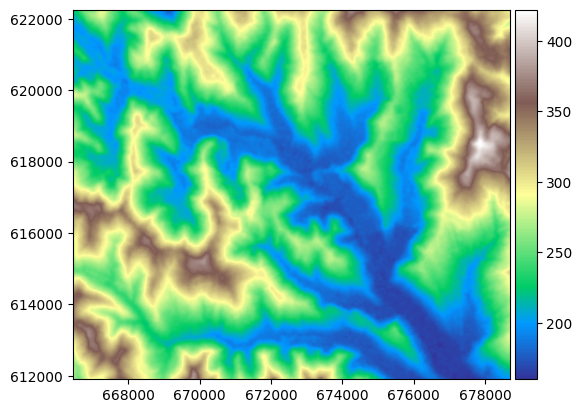

In [17]:
rasters['elevation'].plot(cmap='terrain')

<Axes: >

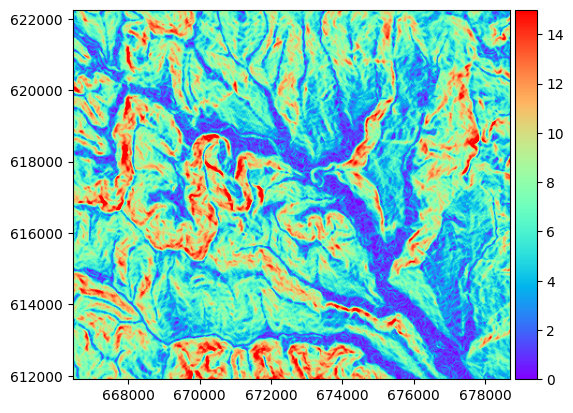

In [18]:
rasters['slope'].plot(cmap='rainbow', vmin=0, vmax=15)

<Axes: >

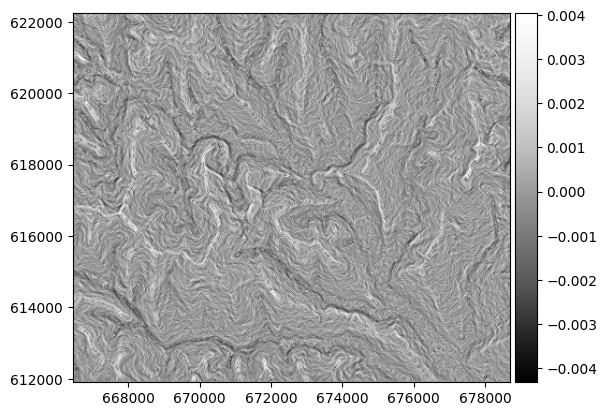

In [19]:
fig, ax = plt.subplots()
rasters['c_prof'].plot(norm='linear', ax=ax)